# Understanding Support Vector Machines (SVM)

Support Vector Machines are supervised learning models that excel at classification and regression tasks by finding the optimal hyperplane to separate data points. Here's how they work:

## Core Concepts

1. *The Hyperplane*  
In a 2D space, a hyperplane is simply a line that separates two classes. In 3D, it's a plane, and in higher dimensions, it becomes a hyperplane. SVM finds the hyperplane that creates the largest margin between classes (i.e., classifies the most points correctly).

2. *Support Vectors*  
The data points (i.e., vectors) that lie closest to the decision boundary (the *marginal* points) "support" the hyperplane by defining its position. Remove other points, and the hyperplane stays the same; remove a support vector, and the hyperplane must shift.

3. *Margin*  
The margin is the distance between the hyperplane and the nearest data point (support vector) from either class. SVM aims to maximize this margin, creating the most robust possible classifier.

## How SVM Works

1. *Finding the Optimal Hyperplane*  
SVM searches for the hyperplane that:
- Correctly separates the classes (when possible)
- Maximizes the margin between classes
- Minimizes classification errors

2. *Mathematical Foundation*  
For a linear SVM, the hyperplane is defined as:
```python
w·x + b = 0
where:
- w is the normal vector to the hyperplane
- x is a point on the hyperplane
- b is the bias term
```

3. *Classification Rules*  
For a new point x:
- If w·x + b > 0: Classify as Class 1
- If w·x + b < 0: Classify as Class 2
- Points exactly on the boundary have w·x + b = 0

## The Kernel Trick

When data isn't linearly separable in the original space, SVM uses the "kernel trick" to map it to a higher-dimensional space where it becomes separable.

1. *Common Kernels*
```python
# Linear Kernel
K(x, y) = x·y

# Polynomial Kernel
K(x, y) = (γx·y + r)^d

# Radial Basis Function (RBF)
K(x, y) = exp(-γ||x - y||²)

# Sigmoid Kernel
K(x, y) = tanh(γx·y + r)
```

2. *How the Kernel Trick Works*  
Instead of explicitly mapping data to higher dimensions (which could be computationally expensive), kernels compute the dot product in the transformed space directly:
```python
# Instead of:
φ(x)·φ(y)

# We compute:
K(x, y)
```
Basically, we're offloading some of the work that the classifier would have to do by
transforming the data into a space where it's easier to classify. 
We'll explore the Kernel Trick in more detail below

## Handling Non-Separable Data

Real-world data often isn't perfectly separable. SVM handles this with "soft margins":

1. *Slack Variables (ξ)*  
- Allow some points to violate the margin
- Control trade-off between margin size and training errors
- Regulated by parameter C (higher C = less tolerance for errors)

2. *Optimization Problem*  
```python
minimize: (1/2)||w||² + C∑ξᵢ
subject to:
yᵢ(w·xᵢ + b) ≥ 1 - ξᵢ
ξᵢ ≥ 0
```

## Simple Example
```python
from sklearn.svm import SVC

# Create and train SVM classifier
svm = SVC(kernel='rbf', C=1.0)
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Get support vectors
support_vectors = svm.support_vectors_
```

## Common Challenges and Solutions

1. *Choosing the Right Kernel*
- Linear: Good for high-dimensional data
- RBF: Versatile, good default choice
- Polynomial: Good for normalized data
- Sigmoid: Similar to neural networks

2. *Parameter Tuning*
- C: Controls trade-off between margin size and error tolerance
- γ: Controls influence of single training points (RBF kernel)
- d: Polynomial degree (polynomial kernel)

3. *Scaling Features*
- Essential for good performance
- Prevents features with larger ranges from dominating
- Usually standardize to mean=0, std=1

## Advantages and Limitations

*Advantages:*
- Effective in high-dimensional spaces
- Memory efficient (uses only support vectors)
- Versatile through different kernel functions
- Theoretically well-founded

*Limitations:*
- Can be computationally intensive for large datasets
- Sensitive to feature scaling
- No direct probability estimates
- Kernel and parameter selection can be challenging


---

# Kernel Methods in Machine Learning: The Kernel Trick

## Introduction
Kernel methods are a powerful class of algorithms in machine learning that map data into higher-dimensional spaces to make classification and regression problems easier to solve. The "kernel trick" allows us to apply these transformations efficiently without explicitly computing the coordinates in the high-dimensional space.

This tutorial will introduce kernel methods with an emphasis on Support Vector Machines (SVMs) and kernelized regression. We'll use Python and Scikit-Learn to demonstrate these concepts with both synthetic and real datasets.

[neat visualization at tf playground](https://playground.tensorflow.org)

---

## 1. Why Use Kernel Methods?
In many classification problems, data points may not be separable by a simple linear decision boundary in their original feature space. Kernel methods allow us to transform the input features to a higher-dimensional space where a linear separator may exist.

For example, consider a dataset where the classes form concentric circles:

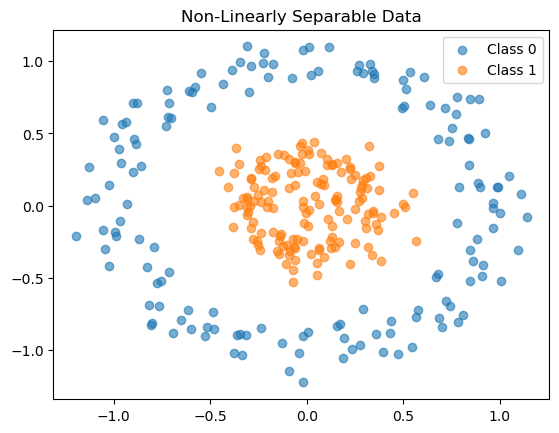

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Generate synthetic data
X, y = make_circles(n_samples=300, factor=0.3, noise=0.1, random_state=42)

# Plot the original data
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', alpha=0.6)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', alpha=0.6)
plt.legend()
plt.title("Non-Linearly Separable Data")
plt.show()

A linear classifier cannot separate these two classes in the original feature space. However, by mapping (transforming) the data into a higher-dimensional space using a kernel function, we can find a linear separator.

---

## 2. The Kernel Trick
The kernel trick allows us to compute the inner product in a higher-dimensional space without explicitly transforming the input features. A kernel function $ K(x_i, x_j) $ defines this inner product in the transformed space.

### Common Kernel Functions:
1. **Linear Kernel:** $ K(x, x') = x^T x' $ (equivalent to a standard dot product)
2. **Polynomial Kernel:** $ K(x, x') = (x^T x' + c)^d $
3. **Radial Basis Function (RBF) Kernel:** $ K(x, x') = \exp(-\gamma ||x - x'||^2) $
4. **Sigmoid Kernel:** $ K(x, x') = \tanh(\alpha x^T x' + c) $

These kernels allow us to implicitly project data into higher dimensions without explicitly computing the transformation.

---

## 3. Kernel SVM Example

Let's apply the RBF kernel to classify the concentric circles dataset using an SVM.


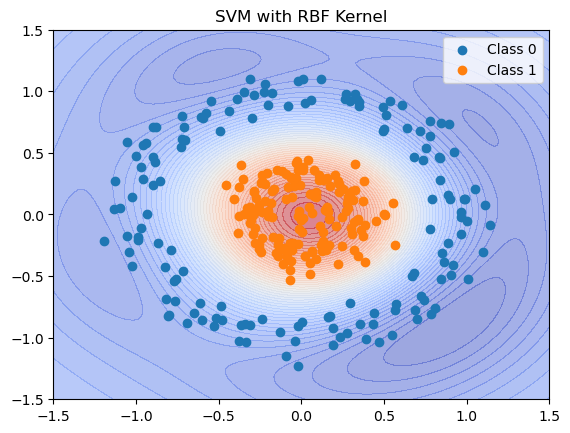

In [19]:
# Define an SVM with an RBF kernel
svm_model = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=1, gamma='scale'))
])

# Train the model
svm_model.fit(X, y)

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 50), cmap=plt.cm.coolwarm, alpha=0.5)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1')
plt.legend()
plt.title("SVM with RBF Kernel")
plt.show()

The RBF kernel successfully maps the data into a higher-dimensional space where a linear decision boundary can be applied.

# plot what the feature space transforms look like

In [20]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.datasets import make_moons, make_circles
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.decomposition import PCA

# Generate synthetic datasets
X_moons, y_moons = make_moons(n_samples=300, noise=0.1, random_state=42)
X_circles, y_circles = make_circles(n_samples=300, factor=0.3, noise=0.1, random_state=42)

# plot the original data
def plot_data_plotly(X, y, title):
    fig = px.scatter(x=X[:, 0], y=X[:, 1], color=y, title=title)
    fig.show()  

plot_data_plotly(X_moons, y_moons, "Moons Dataset")
plot_data_plotly(X_circles, y_circles, "Circles Dataset")

# Polynomial transformation to a higher dimension
poly = PolynomialFeatures(degree=3)
X_moons_poly = poly.fit_transform(X_moons)
X_circles_poly = poly.fit_transform(X_circles)

X_moons_poly_pca = PCA(n_components=4).fit_transform(X_moons_poly)
X_circles_poly_pca = PCA(n_components=4).fit_transform(X_circles_poly)

# 3D Plot after polynomial transformation using Plotly
def plot_3d_data_plotly(X, y, title, features=(1, 2, 3)):
    f1, f2, f3 = features
    fig = go.Figure()
    fig.add_trace(go.Scatter3d(
        x=X[:, f1],
        y=X[:, f2],
        z=X[:, f3],
        mode='markers',
        marker=dict(color=y, colorscale='Viridis', size=5, opacity=0.8)
    ))
    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title=f'Feature {f1}',
            yaxis_title=f'Feature {f2}',
            zaxis_title=f'Feature {f3}'
        )
    )
    fig.show()

# add a 2D plot for polynomial features
def plot_2d_data_plotly(X, y, title, features=(1, 2)):
    f1, f2 = features
    fig = px.scatter(x=X[:, f1], y=X[:, f2], color=y, title=title)
    fig.show()

features2d = (3, 2)
features3d = (3, 0, 2)
plot_2d_data_plotly(X_moons_poly_pca, y_moons, "Polynomial Feature Space (Moons Dataset)",
                    features = features2d)
plot_2d_data_plotly(X_circles_poly_pca, y_circles, "Polynomial Feature Space (Circles Dataset)",
                    features = features2d)

plot_3d_data_plotly(X_moons_poly_pca, y_moons, "Polynomial Feature Space (Moons Dataset)",
                    features = features3d)
plot_3d_data_plotly(X_circles_poly_pca, y_circles, "Polynomial Feature Space (Circles Dataset)",
                    features = features3d)

# RBF Kernel transformation
X_moons_rbf = rbf_kernel(X_moons, X_moons, gamma=12)
X_circles_rbf = rbf_kernel(X_circles, X_circles, gamma=12)

# Visualizing RBF Kernel space using 3D scatter plot
def plot_rbf_kernel_3d(X, y, title):
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)
    fig = go.Figure()
    fig.add_trace(go.Scatter3d(
        x=X_pca[:, 0],
        y=X_pca[:, 1],
        z=X_pca[:, 2],
        mode='markers',
        marker=dict(color=y, colorscale='Viridis', size=5, opacity=0.8)
    ))
    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title='Principal Component 1',
            yaxis_title='Principal Component 2',
            zaxis_title='Principal Component 3'
        )
    )
    fig.show()

plot_rbf_kernel_3d(X_moons_rbf, y_moons, "RBF Kernel Space (Moons Dataset)")
plot_rbf_kernel_3d(X_circles_rbf, y_circles, "RBF Kernel Space (Circles Dataset)")



---

## 5. Choosing the Right Kernel
The choice of kernel depends on the structure of the data:
- **Linear Kernel**: When data is already linearly separable.
- **Polynomial Kernel**: When interactions between features are important.
- **RBF Kernel**: When decision boundaries are highly nonlinear.
- **Sigmoid Kernel**: Sometimes useful for neural network-like behavior.

Hyperparameters like `C` and `gamma` (for RBF) control the model's complexity and should be tuned using cross-validation (e.g., with grid search or bayes search).

Next up would be hyperparameter tuning. Things choosing the optimal kernel and the optimal parameters for that kernel.

## **BONUS**
---

## 5. Kernelized Regression
Kernel methods are also useful in regression tasks. Consider a case where the relationship between features and the target variable is nonlinear.

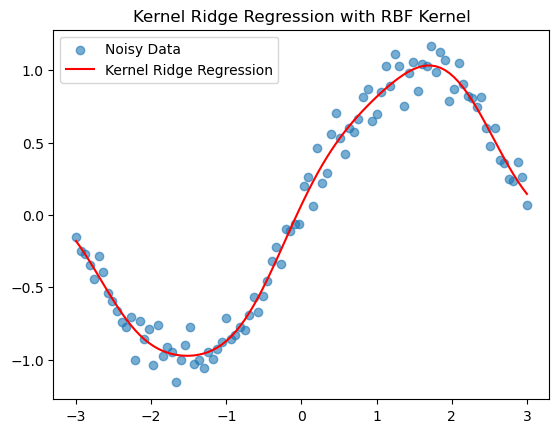

In [4]:
from sklearn.kernel_ridge import KernelRidge

# Generate synthetic regression data
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Train kernel ridge regression model
kr_model = KernelRidge(kernel='rbf', alpha=0.1, gamma=1.0)
kr_model.fit(X, y)

y_pred = kr_model.predict(X)

# Plot results
plt.scatter(X, y, label='Noisy Data', alpha=0.6)
plt.plot(X, y_pred, color='red', label='Kernel Ridge Regression')
plt.legend()
plt.title("Kernel Ridge Regression with RBF Kernel")
plt.show()